In [1384]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [1385]:
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1386]:
df.shape

(1460, 81)

As per data dictionary there are many features where NA is actually a valid value. Therefore, before dropping all NA values from data set replacing the same with a valid value.

# Data cleaning

In [1387]:
df.drop(columns=['Id'], inplace=True)

In [1388]:
df.isnull().sum()[df.isnull().sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [1389]:
df.Alley.fillna('NAA', inplace=True) #No Alley Access
df.BsmtQual.fillna('NB', inplace=True) #No Basement
df.BsmtCond.fillna('NB', inplace=True) #No Basement
df.BsmtExposure.fillna('NB', inplace=True) #No Basement
df.BsmtFinType1.fillna('NB', inplace=True) #No Basement
df.BsmtFinType2.fillna('NB', inplace=True) #No Basement
df.FireplaceQu.fillna('NF', inplace=True) #No Fireplace
df.GarageType.fillna('NG', inplace=True) #No Garage
df.GarageFinish.fillna('NG', inplace=True) #No Garage
df.GarageQual.fillna('NG', inplace=True) #No Garage
df.GarageCond.fillna('NG', inplace=True) #No Garage
df.GarageCond.fillna('NG', inplace=True) #No Garage
df.PoolQC.fillna('NP', inplace=True) #No Pool
df.Fence.fillna('NF', inplace=True) #No Fence
df.MiscFeature.fillna('NMF', inplace=True) #no Misc. feature

In [1390]:
df.isnull().sum()[df.isnull().sum() > 0]

LotFrontage    259
MasVnrType       8
MasVnrArea       8
Electrical       1
GarageYrBlt     81
dtype: int64

### `LotFrontage`

In [1391]:
df.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [1392]:
#since LotFrontage is a float (numeric continuous) type of column, replacing NaN by median
df.LotFrontage.fillna(df.LotFrontage.median(), inplace=True)
df.isnull().sum()[df.isnull().sum() > 0]

MasVnrType      8
MasVnrArea      8
Electrical      1
GarageYrBlt    81
dtype: int64

###  `MasVnrType` and `MasVnrArea`

In [1393]:
df[['MasVnrType', 'MasVnrArea']][df.MasVnrType.isnull()]

,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


From above output it is clear that `MasVnrType` and `MasVnrArea` both have NA values because there is no Veneer. Hence, replacing same with corresponding values

In [1394]:
df.MasVnrType.fillna('None', inplace=True)
df.MasVnrArea.fillna(0, inplace=True)
df.isnull().sum()[df.isnull().sum() > 0]

Electrical      1
GarageYrBlt    81
dtype: int64

### `Electrical`

In [1395]:
#since Electrical is a categorical variable, replacing null values wiht mode
df.Electrical.fillna(df.Electrical.mode()[0], inplace=True)
df.isnull().sum()[df.isnull().sum() > 0]

GarageYrBlt    81
dtype: int64

### `GarageYrBlt`

In [1396]:
#Checking whether garage exists for above missing values
df[['GarageType', 'GarageYrBlt']][df.GarageYrBlt.isnull() & (df.GarageType == 'NG')]

,GarageType,GarageYrBlt
39,NG,NaN
48,NG,NaN
78,NG,NaN
88,NG,NaN
89,NG,NaN
...,...,...
1349,NG,NaN
1407,NG,NaN
1449,NG,NaN
1450,NG,NaN


From above output it is clear that the `GarageYrBlt` variable is null because the property does not have a Garage. Therefore, replacing all NA values with next year, to indicate that the Garage is not built yet.

In [1397]:
df.GarageYrBlt.fillna(int(datetime.date.today().strftime("%Y"))+1, inplace=True)
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

Features like `MSSubClass`, `OverallQual` and `OverallCond` have numeric values, but are actually categorical variables. Hence to simplify analysis replacing the values.

In [1398]:
df.MSSubClass = df.MSSubClass.map({20:'1-STORY 1946 & NEWER ALL STYLES',30:'1-STORY 1945 & OLDER',40:'1-STORY W/FINISHED ATTIC ALL AGES',45:'1-1/2 STORY - UNFINISHED ALL AGES',50:'1-1/2 STORY FINISHED ALL AGES',60:'2-STORY 1946 & NEWER',70:'2-STORY 1945 & OLDER',75:'2-1/2 STORY ALL AGES',80:'SPLIT OR MULTI-LEVEL',85:'SPLIT FOYER',90:'DUPLEX - ALL STYLES AND AGES',120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',150:'1-1/2 STORY PUD - ALL AGES',160:'2-STORY PUD - 1946 & NEWER',180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})
df.OverallQual = df.OverallQual.map({10:'Very Excellent',9:'Excellent',8:'Very Good',7:'Good',6:'Above Average',5:'Average',4:'Below Average',3:'Fair',2:'Poor',1:'Very Poor'})
df.OverallCond = df.OverallCond.map({10:'Very Excellent',9:'Excellent',8:'Very Good',7:'Good',6:'Above Average',5:'Average',4:'Below Average',3:'Fair',2:'Poor',1:'Very Poor'})

# Deriving values

In [1399]:
#computing age of property and garage based on current year, for how many years the property as been sold and remodeling age
df['PropertyAge']=int(datetime.date.today().strftime("%Y")) - df.YearBuilt
df['GarageAge']=int(datetime.date.today().strftime("%Y"))  - df.GarageYrBlt
df['PropSoldSince']=int(datetime.date.today().strftime("%Y"))  - df.YrSold
df['PropRbltAge']=int(datetime.date.today().strftime("%Y"))  - df.YearRemodAdd

## Data analysis

In [1400]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 84 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   object 
 17  OverallCond    1460 non-null   object 
 18  YearBuil

<AxesSubplot:>

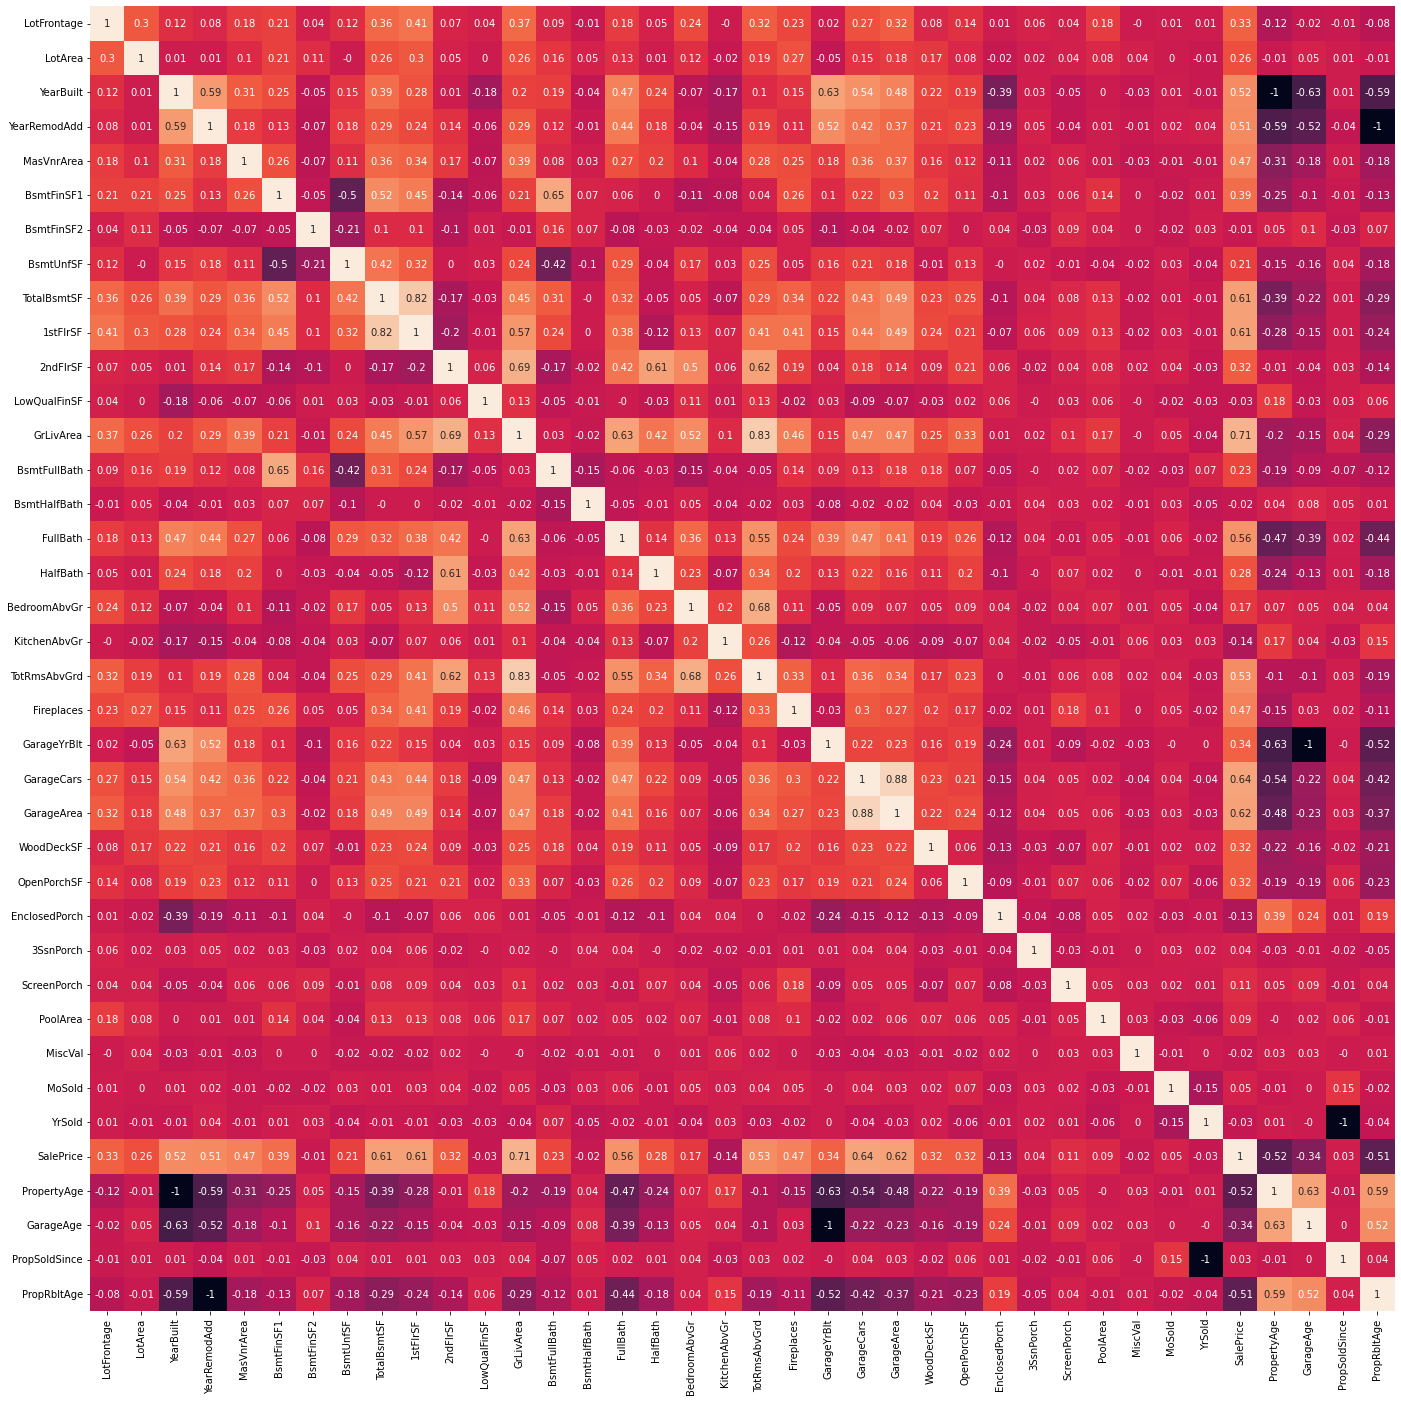

In [1401]:
# Finding correlation between all numeric features
plt.figure(figsize=(24,24))
sns.heatmap(round(df.corr(), 2),annot=True, cbar=False, square=True)

<span style="background:orange">As per correlation, Sale price is __highly correlated__ with *PropertyAge, PropRebltAge TotalBsmtSF, 1stFlrSF, GrLivArea, FullBath, TotRmsAbvGrd, GarageCars, GarageArea* and least correlated with *BsmtUnfSF, LowQualFinSF, BsmtHalfBath, 3SsnPorch, MiscVal, MoSold, YrSold, PropSoldSince*

In [1402]:
print(df.select_dtypes(include=['object']).columns)
print(len(df.select_dtypes(include=['object']).columns))

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')
46


For better analysis creating groups of categorical features.

In [1403]:
#creating a function to plot EDA graphs
def plot_analysis(cols, df):
    plt.figure(figsize=(24,24))
    for i, col in enumerate(cols):
        plt.subplot(8,2,i*2+1)
        plt.xticks(rotation=90)
        sns.countplot(y=col, data=df)
        plt.subplot(8,2,i*2+2)
        plt.xticks(rotation=90)
        sns.boxplot(x=col, y='SalePrice', data=df)
    plt.show()

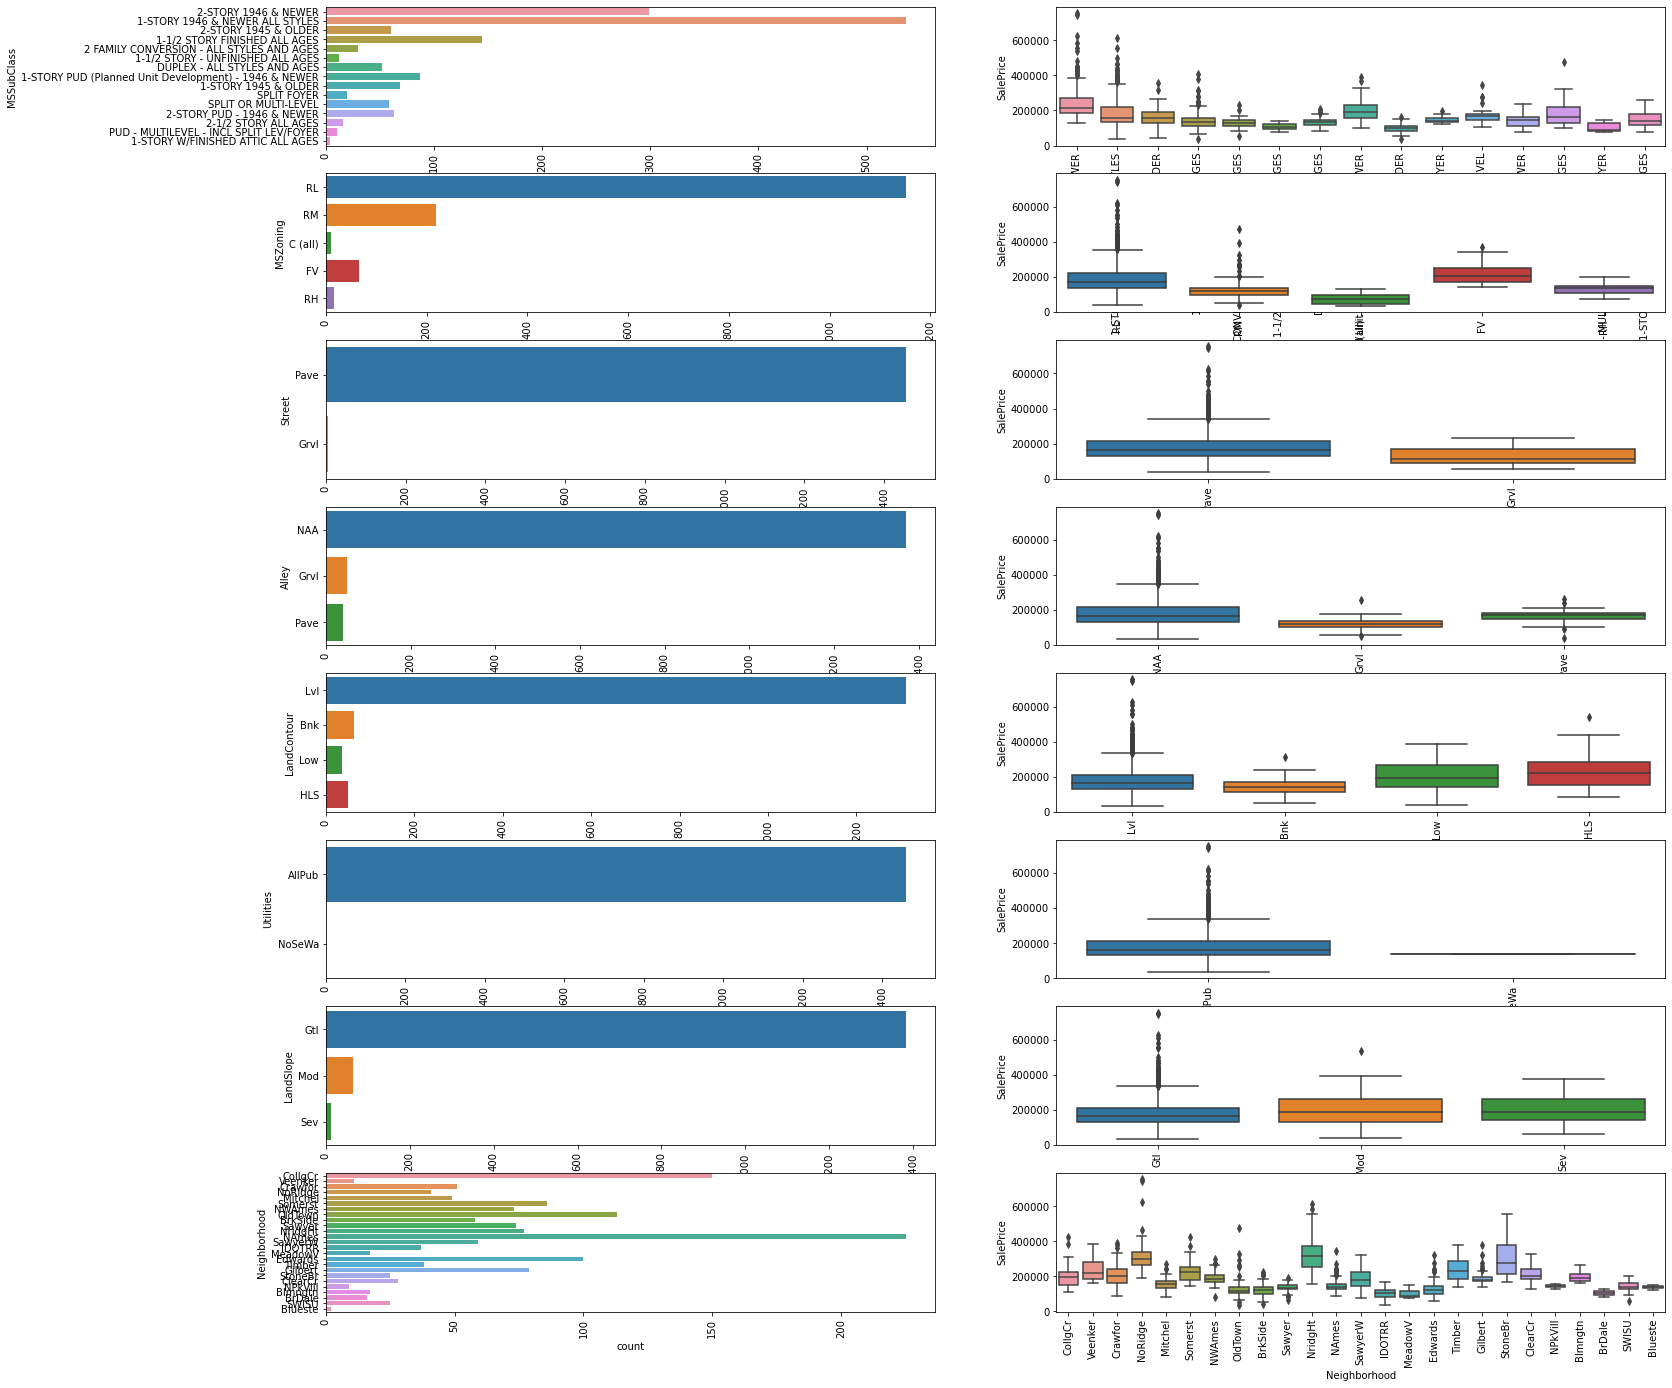

In [1404]:
plot_analysis(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LandContour', 'Utilities', 'LandSlope', 'Neighborhood'], df)

In [1405]:
#as per above analysis Utilities and Street are highly skewed. Hence, dropping these columns
df.drop(columns=['Utilities', 'Street'], axis=1, inplace=True)

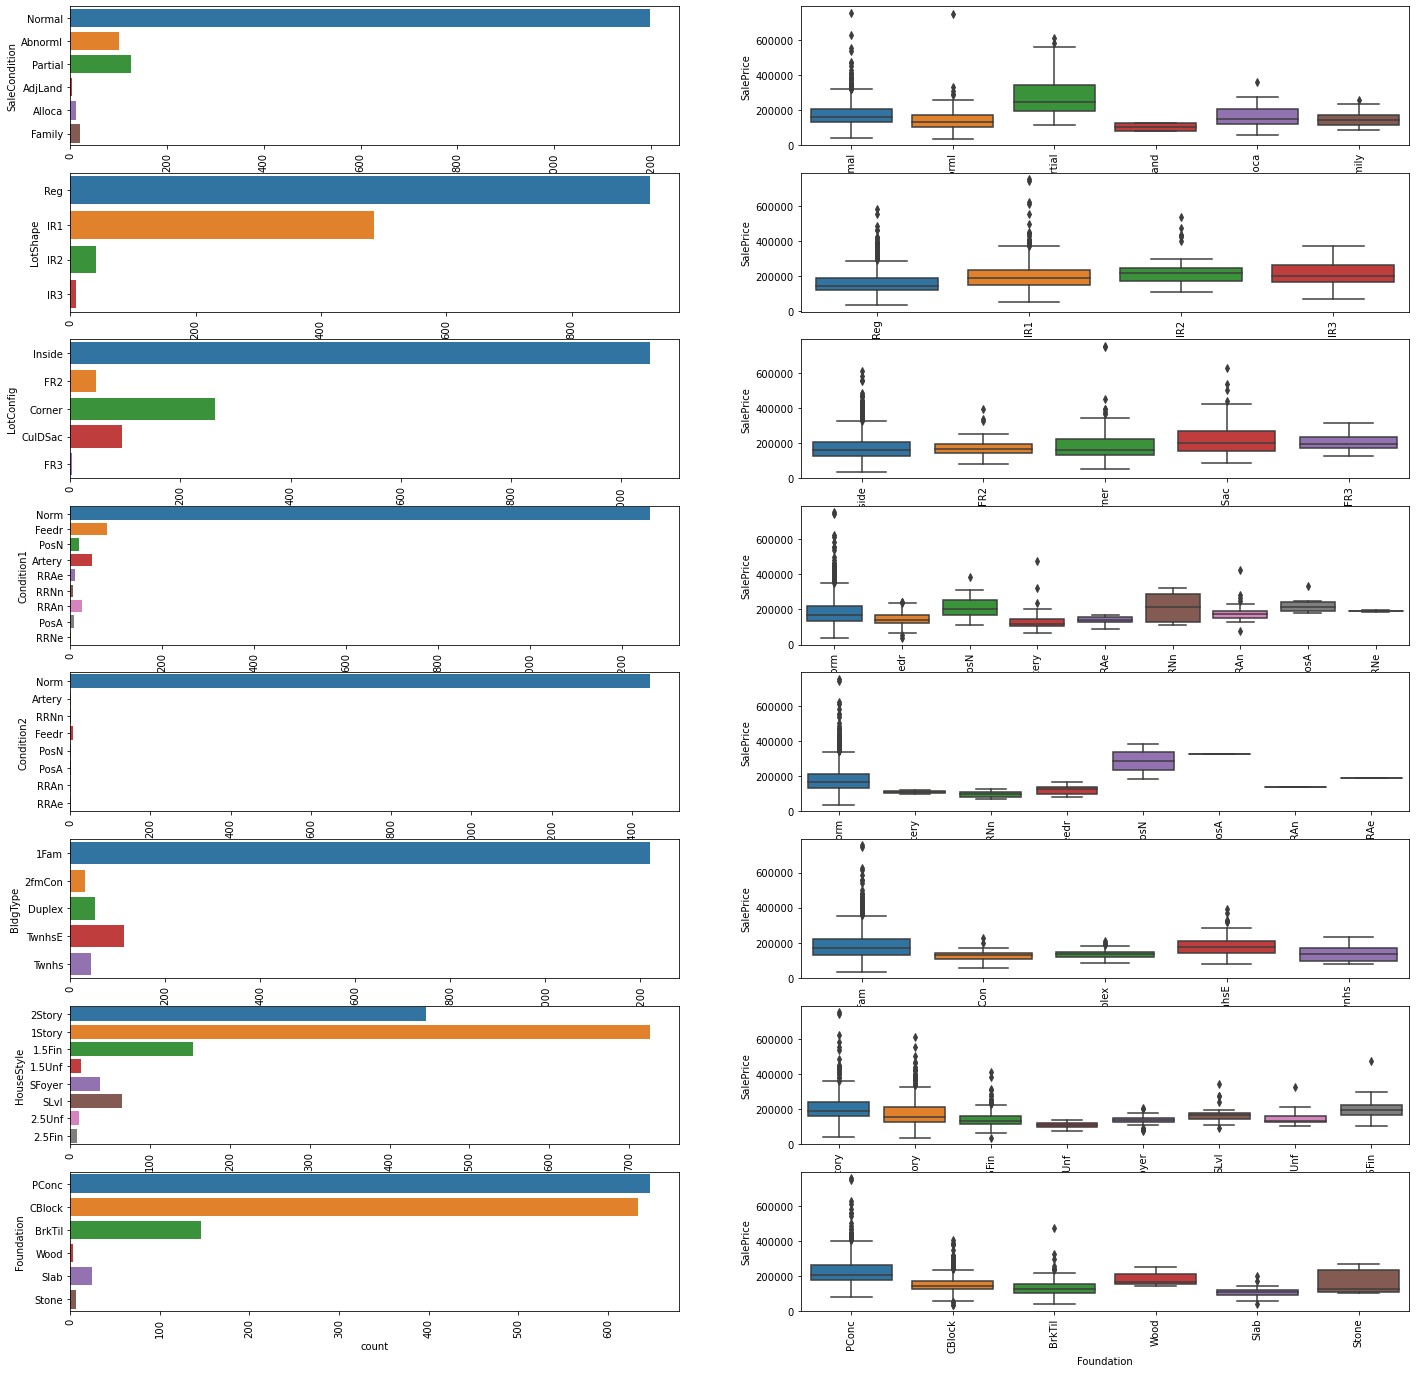

In [1406]:
plot_analysis(['SaleCondition', 'LotShape', 'LotConfig', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'Foundation'], df)

In [1407]:
#as per above analysis Condition2 is highly skewed. Hence, dropping these columns
df.drop(columns=['Condition2'], axis=1, inplace=True)

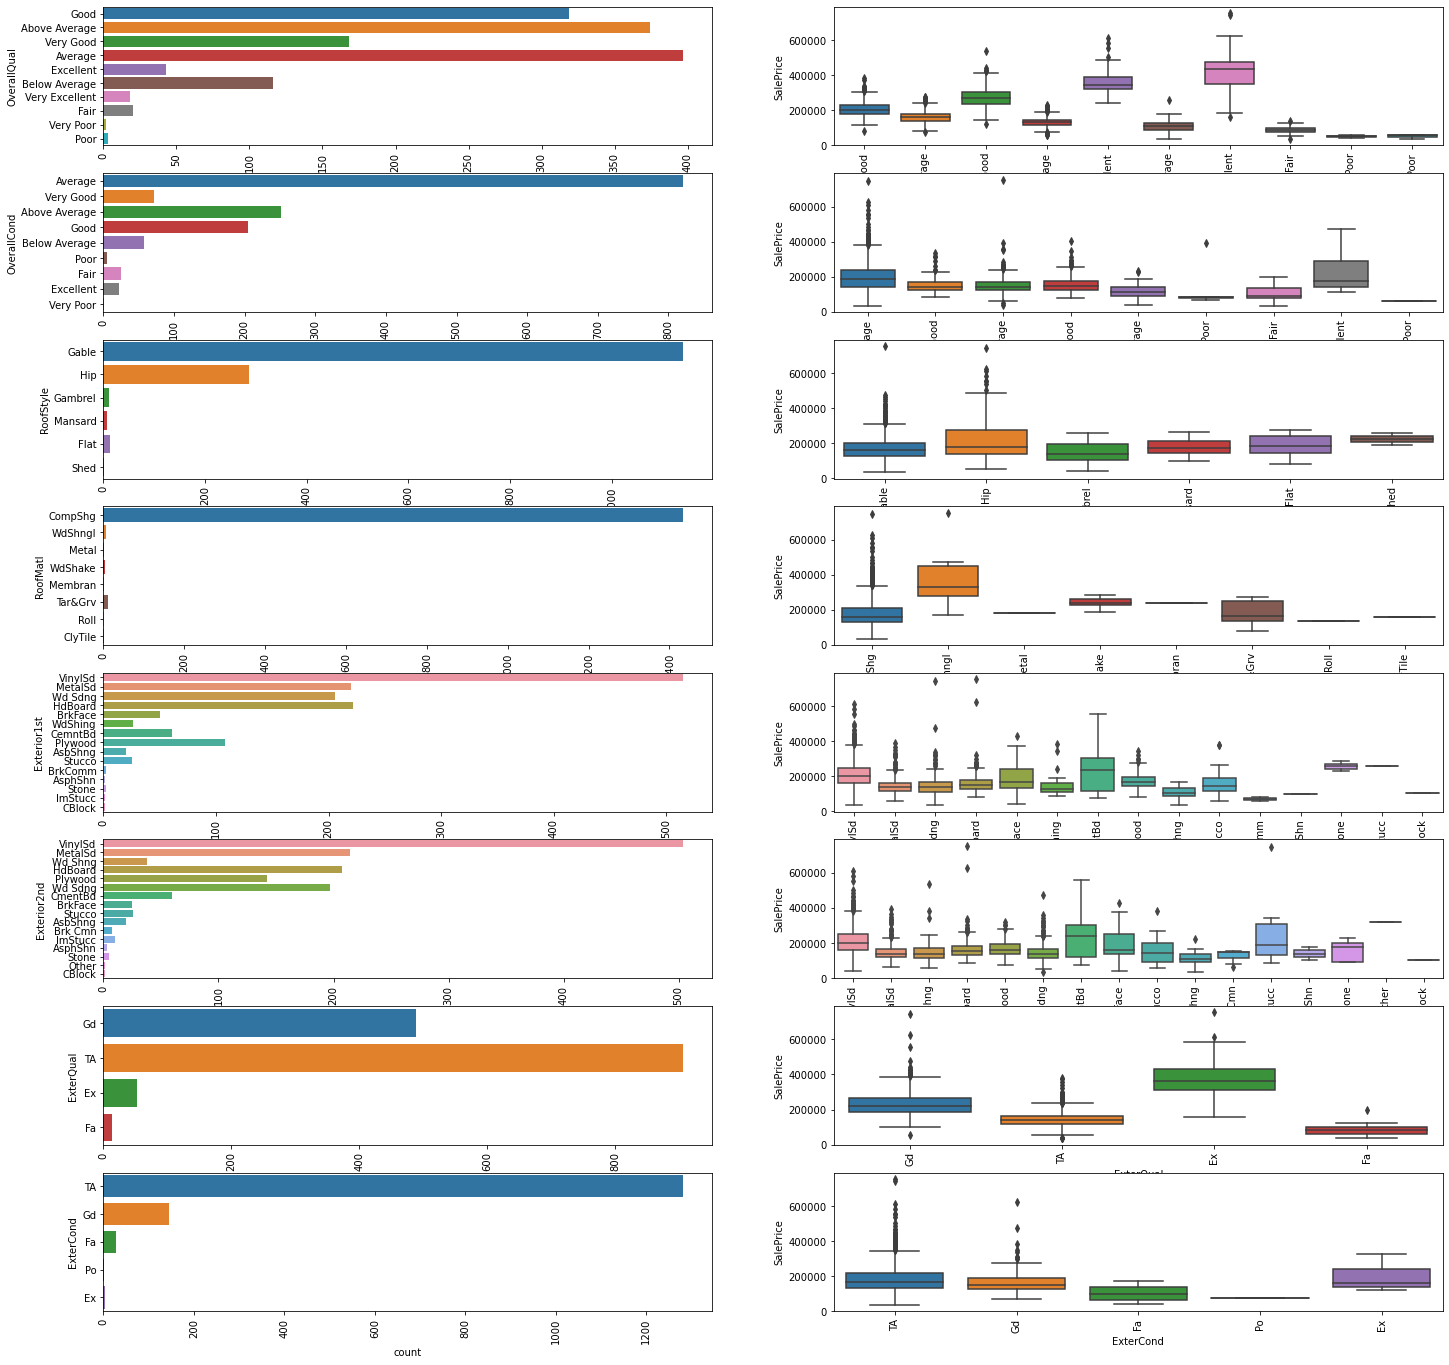

In [1408]:
plot_analysis(['OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond'], df)

In [1409]:
#as per above analysis RoofMatl is highly skewed. Hence, dropping these columns
df.drop(columns=['RoofMatl'], axis=1, inplace=True)

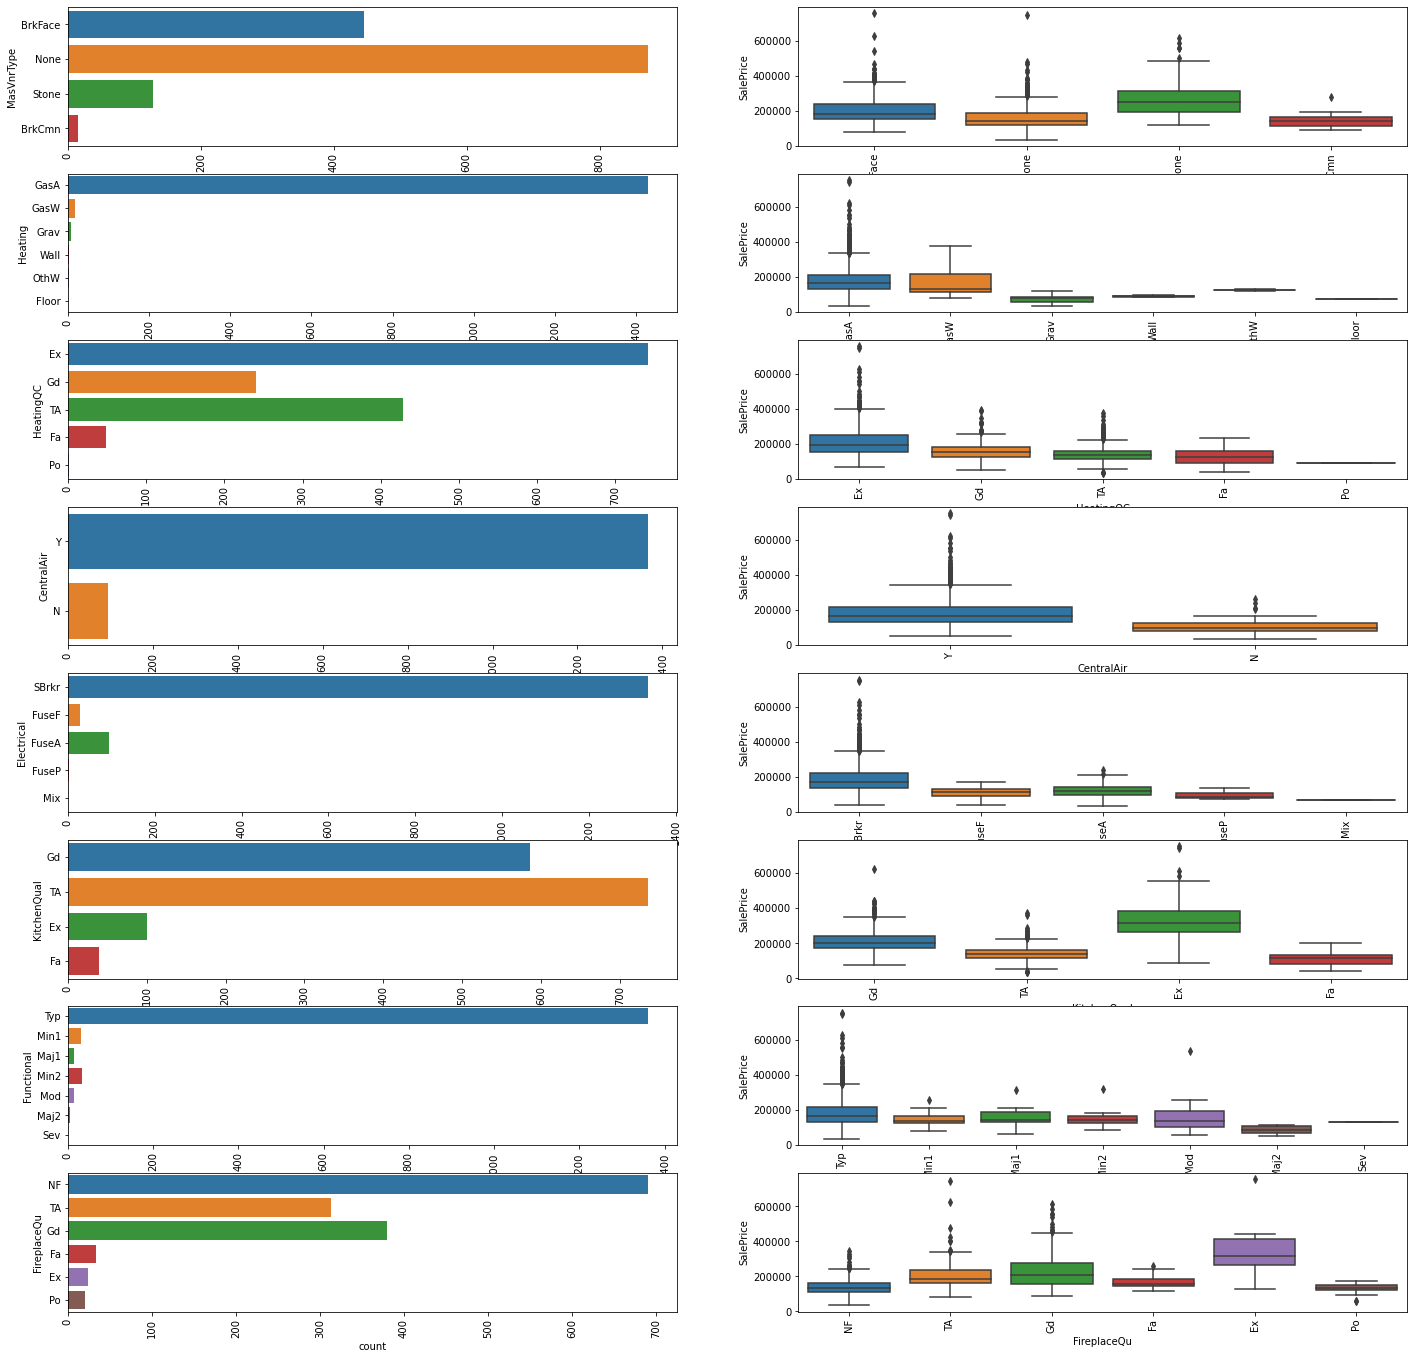

In [1410]:
plot_analysis(['MasVnrType', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu'], df)

In [1411]:
#as per above analysis Heating is highly skewed. Hence, dropping these columns
df.drop(columns=['Heating'], axis=1, inplace=True)

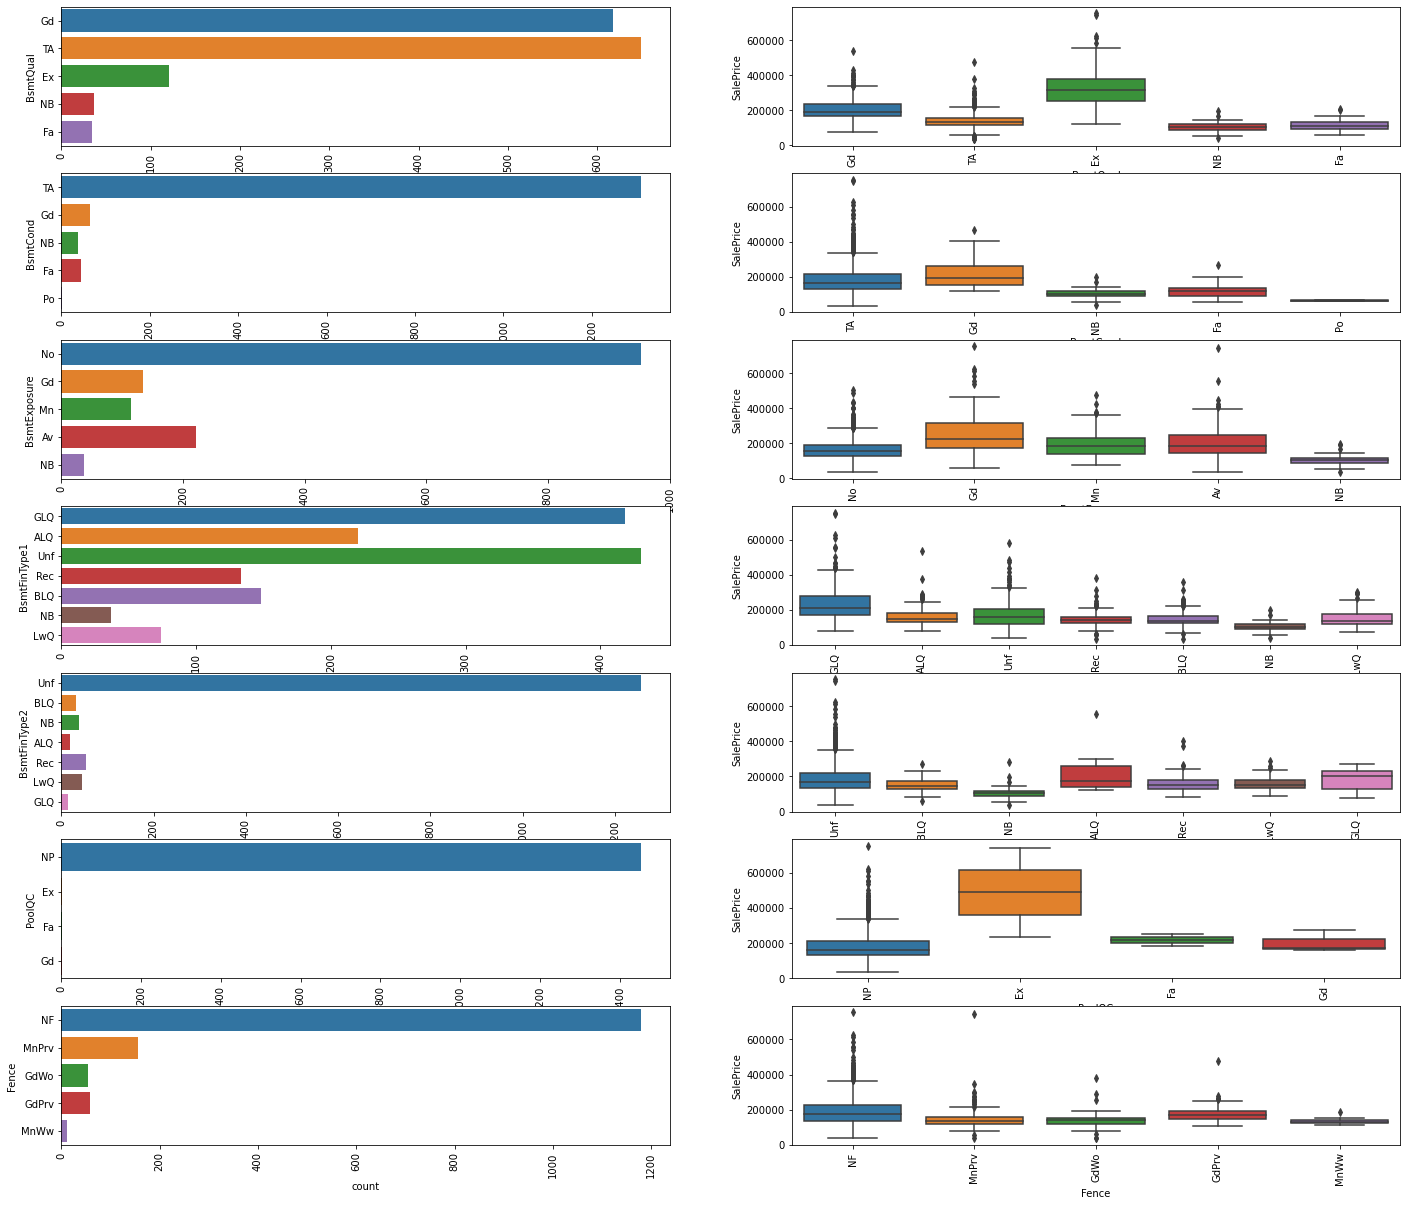

In [1412]:
plot_analysis(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'PoolQC', 'Fence'], df)

In [1413]:
#as per above analysis PoolQC is highly skewed. Hence, dropping these columns
df.drop(columns=['PoolQC'], axis=1, inplace=True)

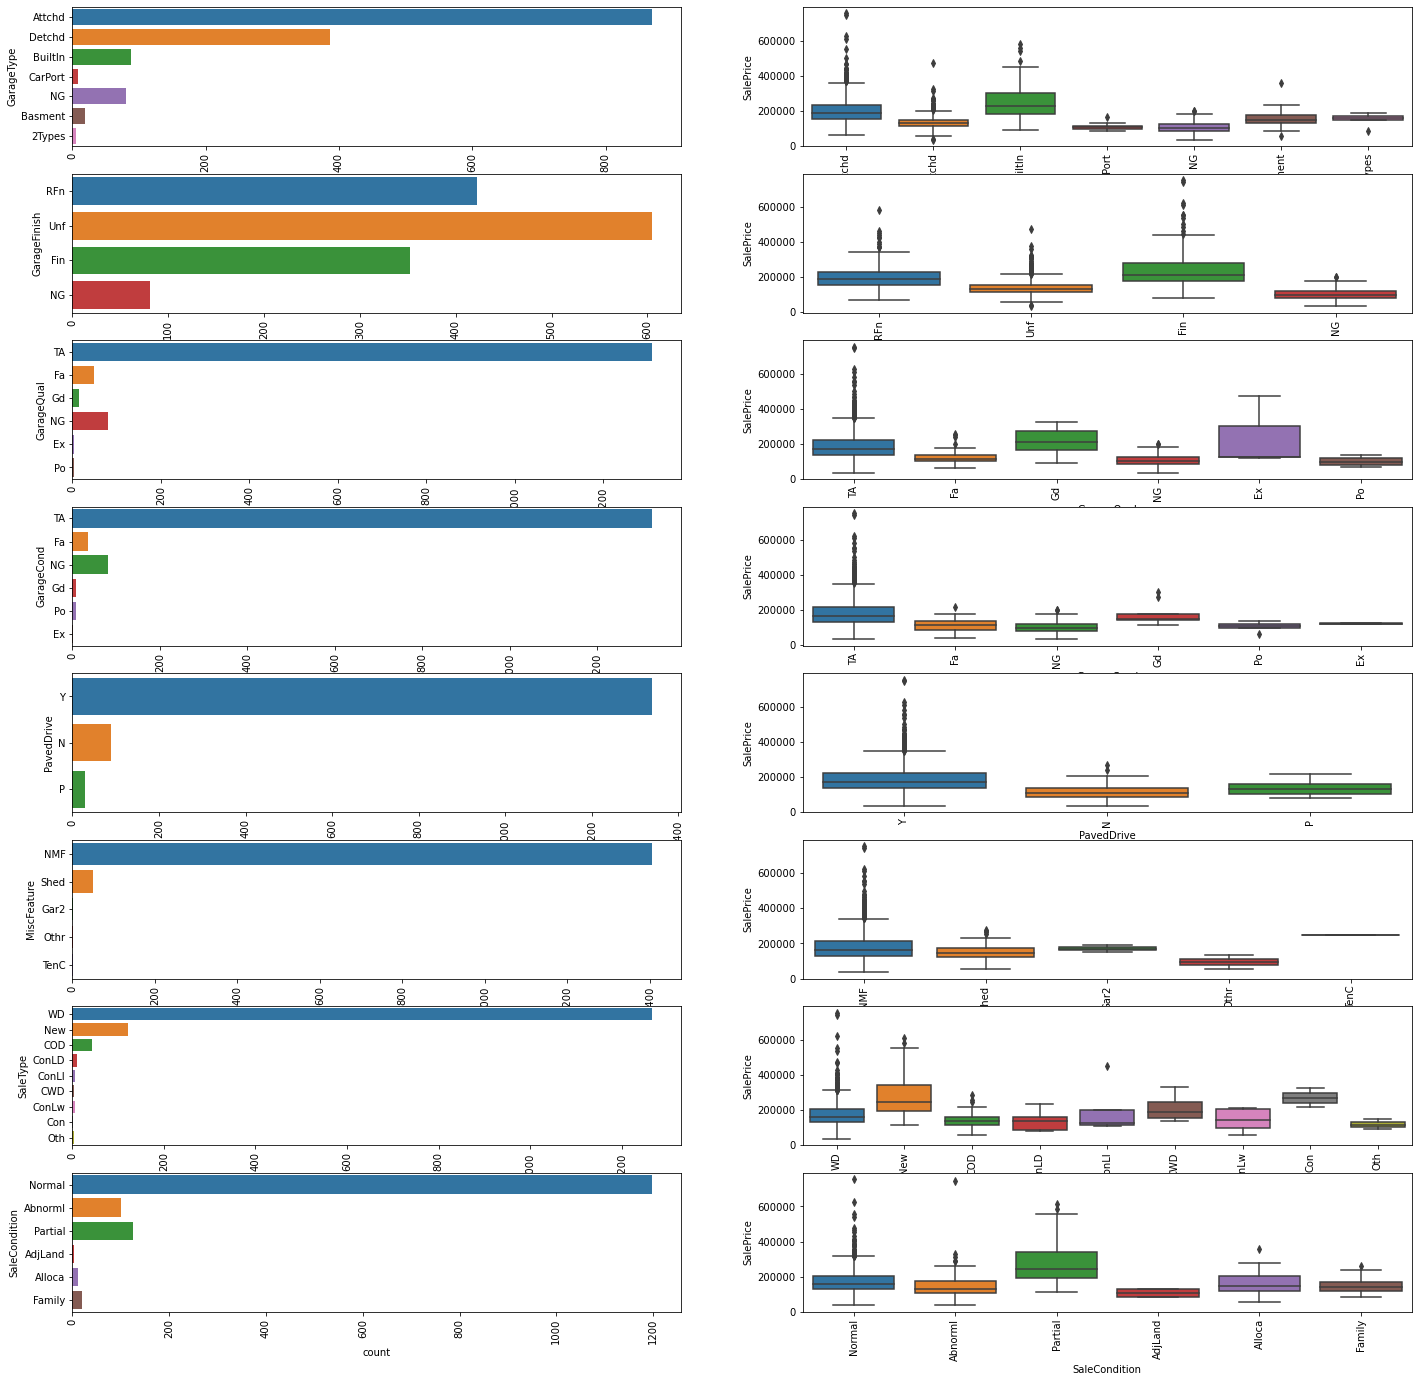

In [1414]:
plot_analysis(['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition'], df)

In [1415]:
#as per above analysis MiscFeature is highly skewed. Hence, dropping these columns
df.drop(columns=['MiscFeature'], axis=1, inplace=True)

In [1416]:
df[['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']]

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
0,706,0,150,856
1,978,0,284,1262
2,486,0,434,920
3,216,0,540,756
4,655,0,490,1145
...,...,...,...,...
1455,0,0,953,953
1456,790,163,589,1542
1457,275,0,877,1152
1458,49,1029,0,1078


In [1417]:
#Since, Basement area is already covered by TotalBsmtSF, removing 'BsmtFinSF1', 'BsmtFinSF2' and 'BsmtUnfSF'
df.drop(columns=['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'], axis=1, inplace=True)

In [1418]:
df.shape

(1460, 74)

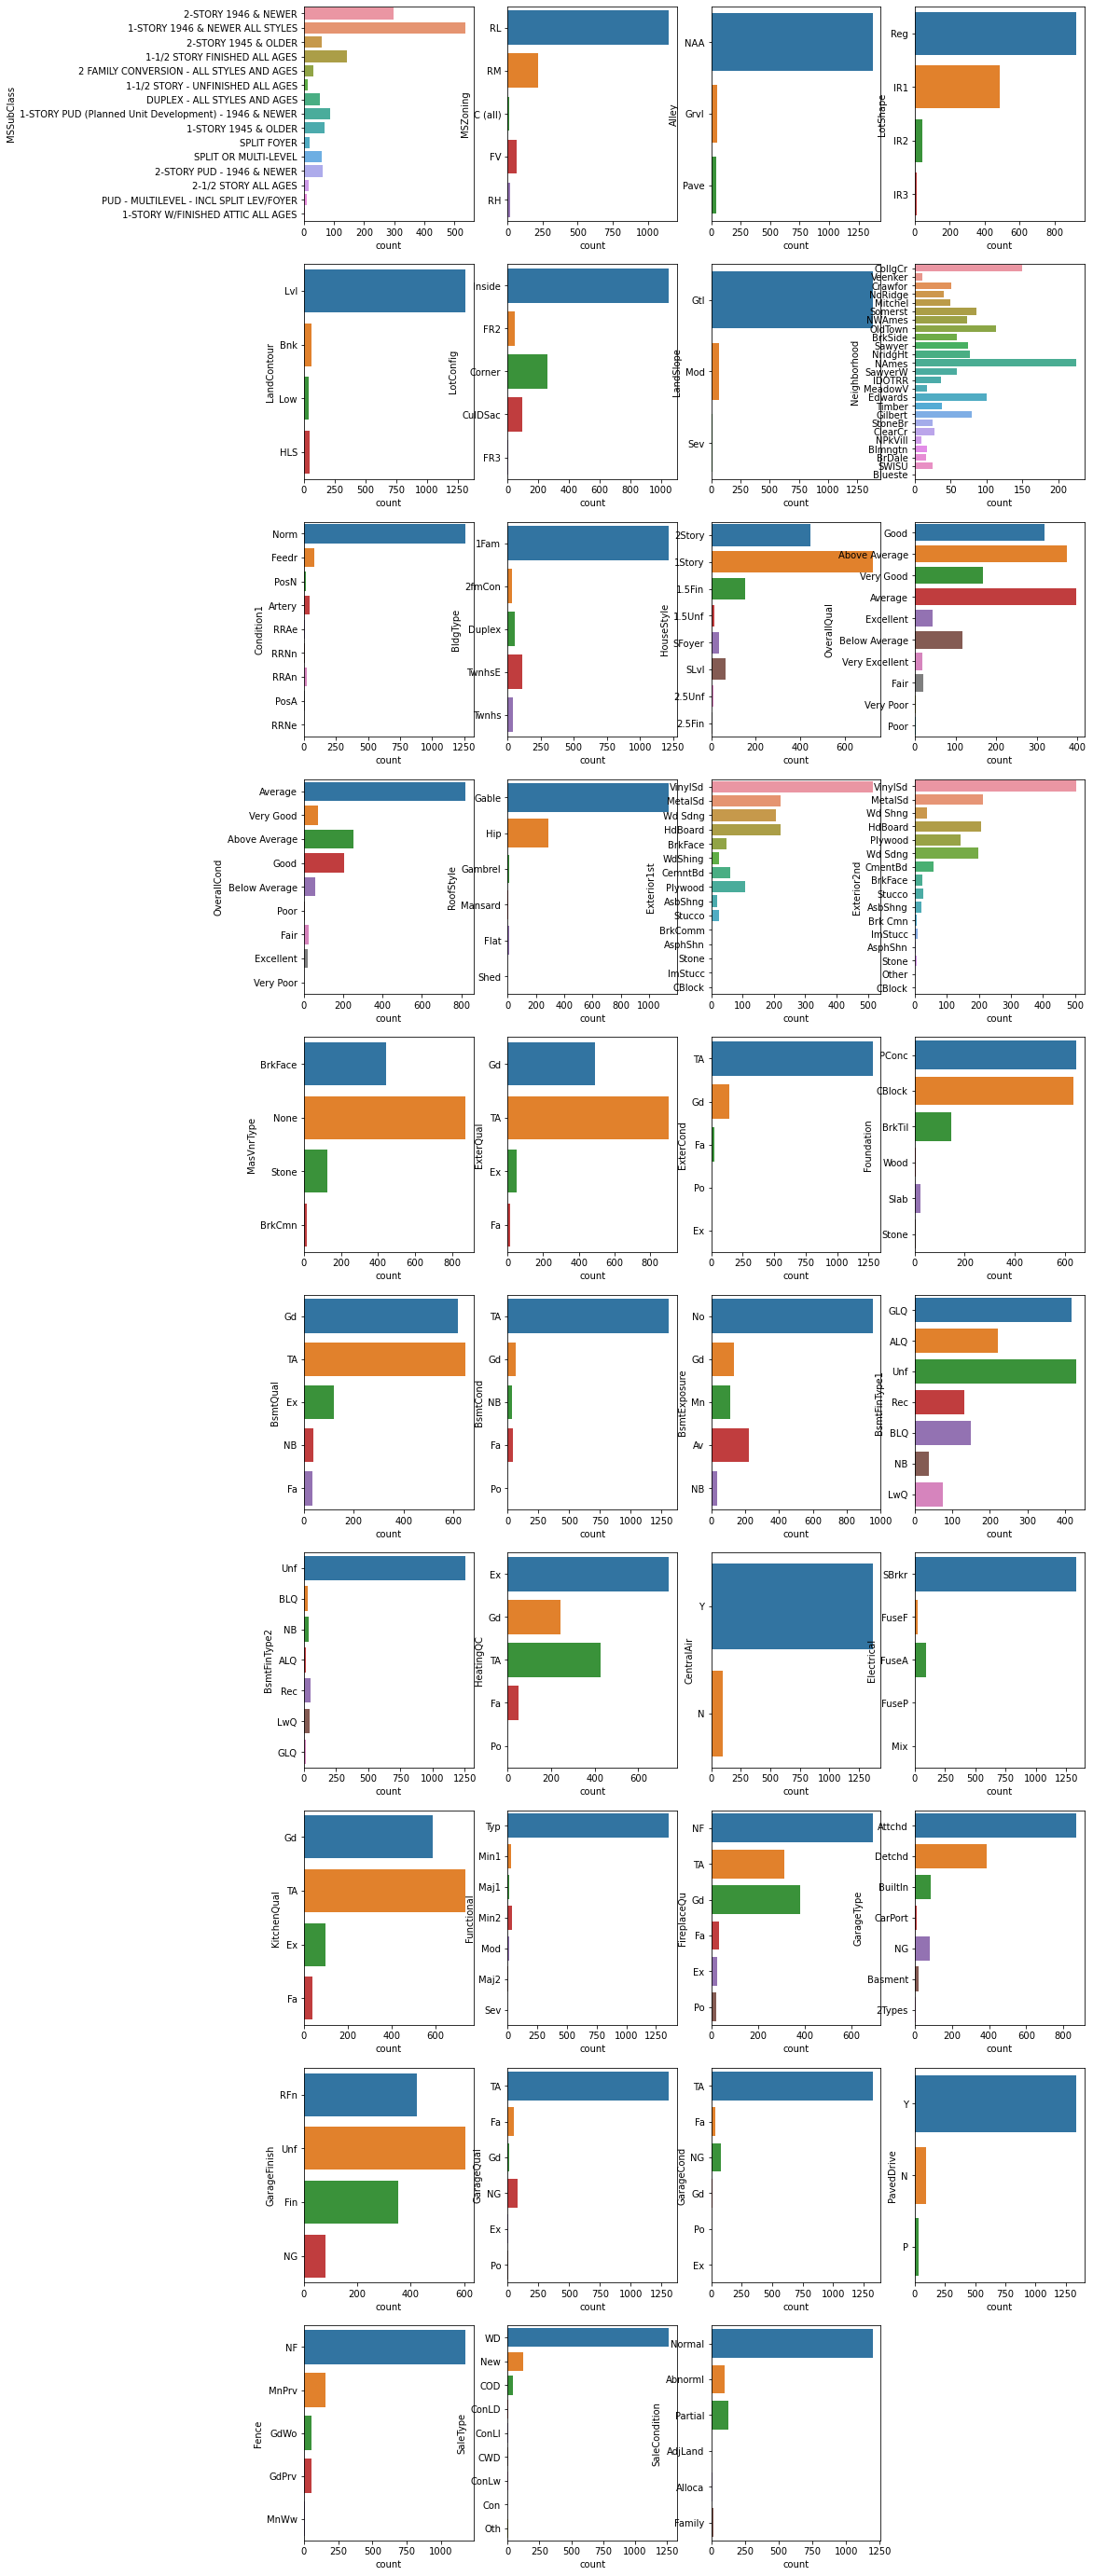

In [1419]:
plt.figure(figsize=(15,50))
for i, col in enumerate(df.select_dtypes(include=['object']).columns):
    plt.subplot((len(df.select_dtypes(include=['object']).columns) // 4) + 1, 4, i+1)
    sns.countplot(data=df, y=col)

In [1420]:
#from above analysis removing some highly skewed categorical variables
df.drop(columns=['Alley', 'LandContour', 'LandSlope', 'Condition1', 'RoofStyle', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Electrical', 'Functional', 'GarageCond', 'SaleType'], axis=1, inplace=True)

### Analysing property sale trend

<AxesSubplot:xlabel='MoSold', ylabel='count'>

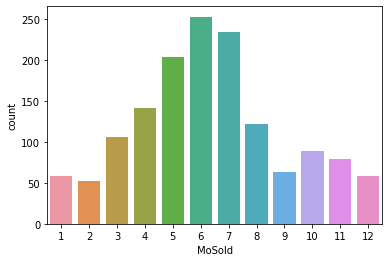

In [1421]:
sns.countplot(x='MoSold', data=df)

<span style='background:orange'>Mostly the properties are sold in the month of __June, July__

<AxesSubplot:xlabel='YearRemodAdd', ylabel='count'>

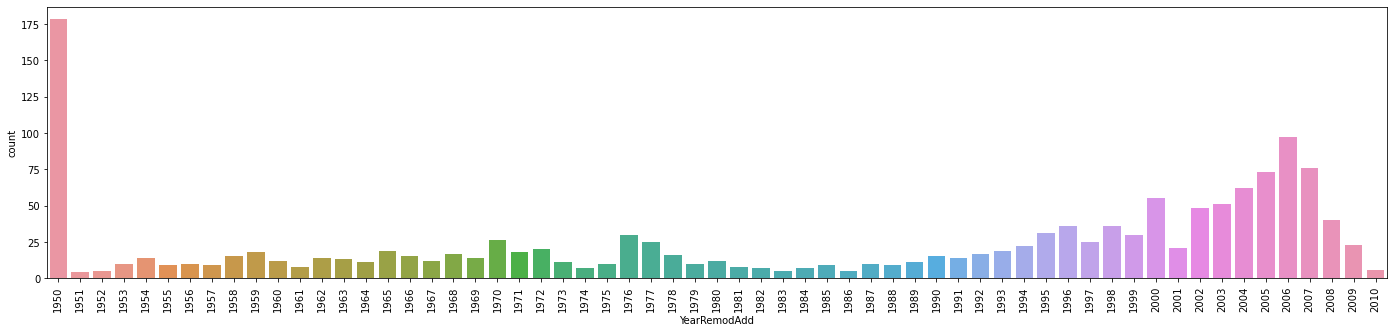

In [1422]:
plt.figure(figsize=(24,5))
plt.xticks(rotation=90)
sns.countplot(x='YearRemodAdd', data=df)

There was a very high remodeling rate in the year of 1950, then it gradually started growing and in 2006 most of the properties were remodeled

<AxesSubplot:xlabel='YrSold', ylabel='count'>

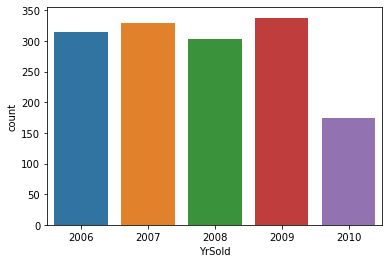

In [1423]:
sns.countplot(x='YrSold', data=df)

<span style='background:orange'>The properties were sold in the year of 2006. Therefore, from above two graphs, we can conclude that __most of the properties were put on sale after remodelling__.

In [1424]:
#Since we already have analysed Year related features. Dropping the same as we already have derived age.
df.drop(columns=['YearBuilt','GarageYrBlt','YrSold','YearRemodAdd'], axis=1, inplace=True)

### Analysing sale price

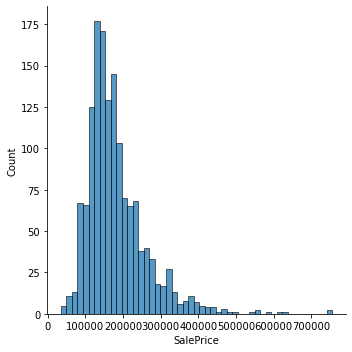

In [1425]:
# Checking SalePrice distribution
sns.displot(df.SalePrice)

The sale price is skewed and hence needs transformation to be in normalized form

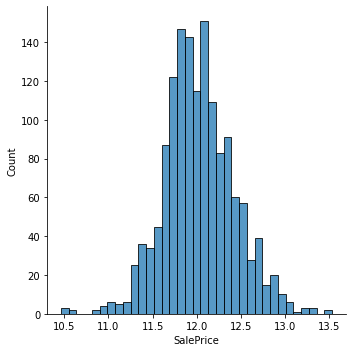

In [1426]:
df['SalePrice'] = np.log(df.SalePrice)
sns.displot(df.SalePrice)

Now the SalePrice is normallly distributed we can go ahead with further analysis.

### Analysing SalePrice w.r.t. other property parameters

In [1427]:
col_to_analyse1 = ['LotFrontage', 'LotArea', 'PropertyAge', 'MasVnrArea', 'TotalBsmtSF', 'PropRbltAge', 'GrLivArea']
col_to_analyse2 = ['1stFlrSF', '2ndFlrSF', 'TotRmsAbvGrd', 'Fireplaces', 'PoolArea', 'GarageAge', 'GarageArea']
col_to_analyse3 = ['FullBath', 'TotRmsAbvGrd', 'GarageCars']

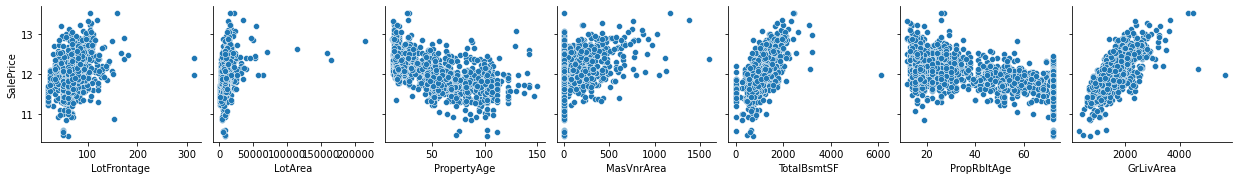

In [1428]:
sns.pairplot(data=df, x_vars=col_to_analyse1, y_vars='SalePrice')

LotFrontage, GrLivArea and LotArea are skewed, due to out liers. Hence, removing the same.

In [1429]:
def remove_outliers_and_analyse(colname, value, df):
    plt.figure(figsize=(25,5))
    plt.subplot(1,3,1)
    sns.boxplot(df[colname])
    plt.subplot(1,3,2)
    sns.boxplot(df[colname][df[colname] < value])
    #removing outliers from given column
    df = df[df[colname] < value]
    plt.subplot(1,3,3)
    sns.scatterplot(data=df, x=colname, y='SalePrice')
    return df

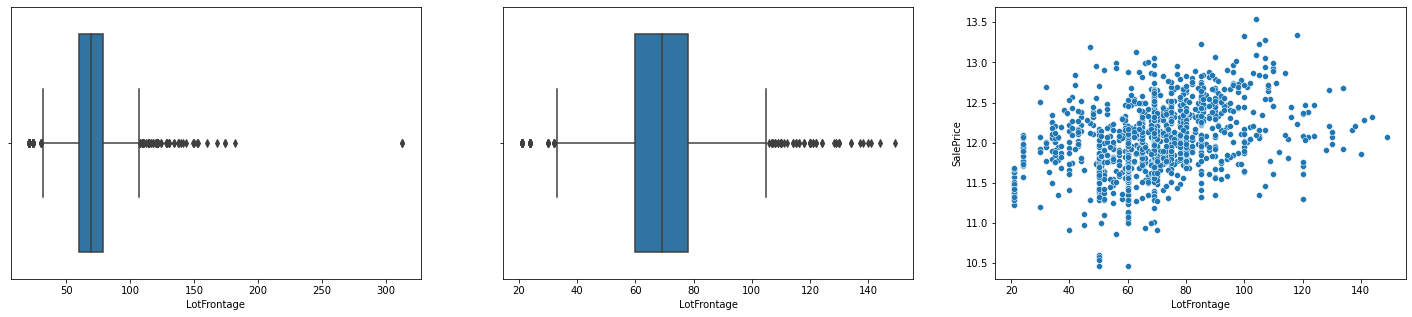

In [1430]:
df = remove_outliers_and_analyse('LotFrontage',150, df)

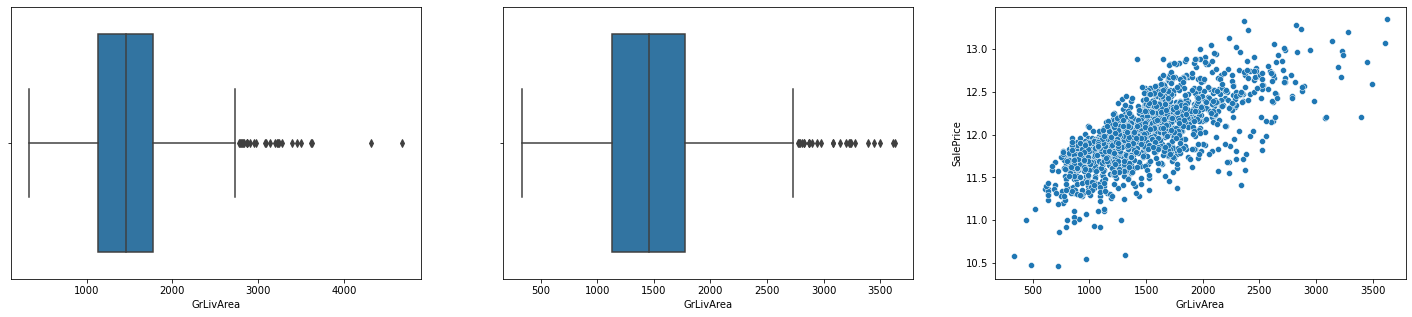

In [1431]:
df = remove_outliers_and_analyse('GrLivArea', 4000, df)

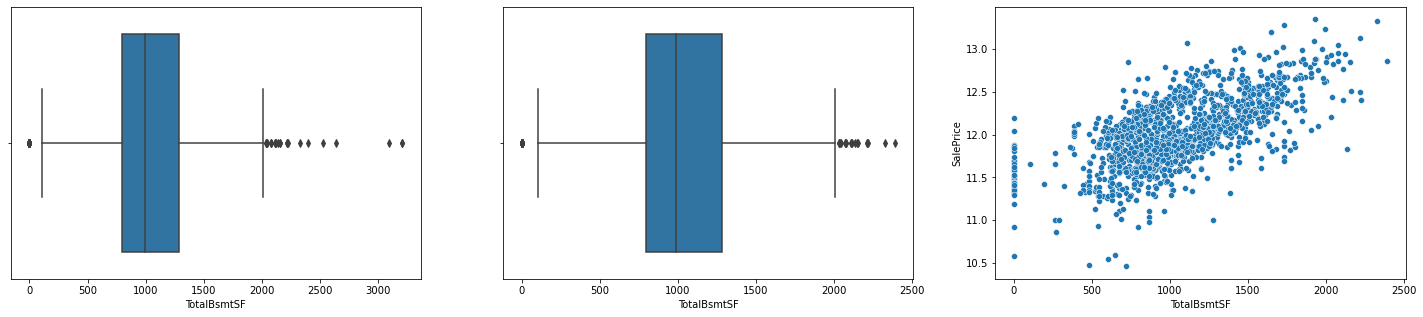

In [1432]:
df = remove_outliers_and_analyse('TotalBsmtSF', 2500, df)

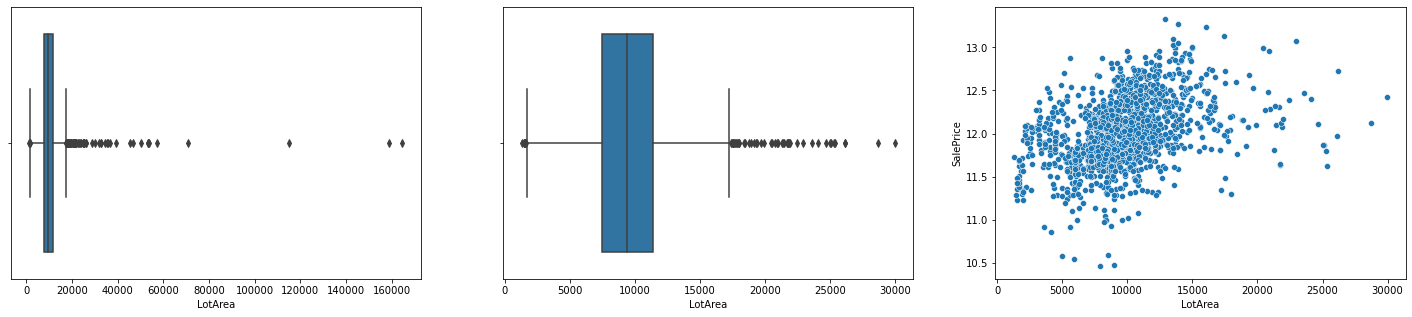

In [1433]:
df = remove_outliers_and_analyse('LotArea', 30000, df)

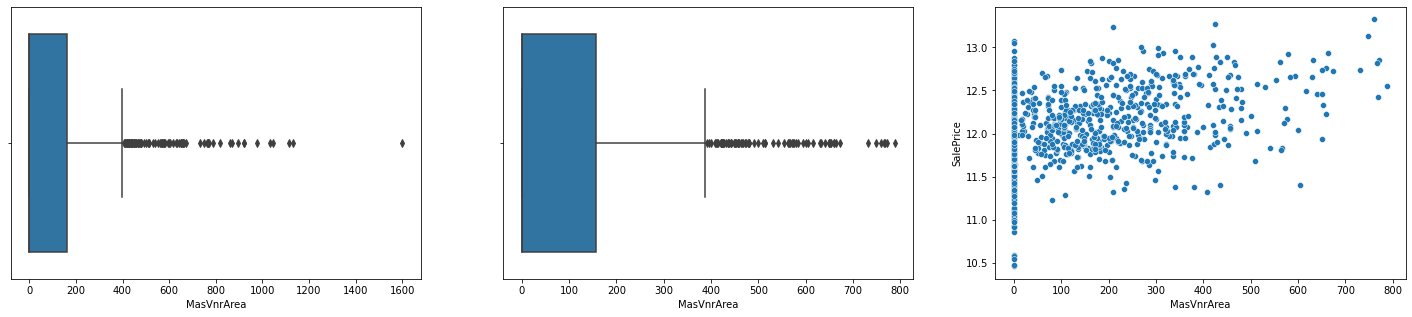

In [1434]:
df = remove_outliers_and_analyse('MasVnrArea', 800, df)

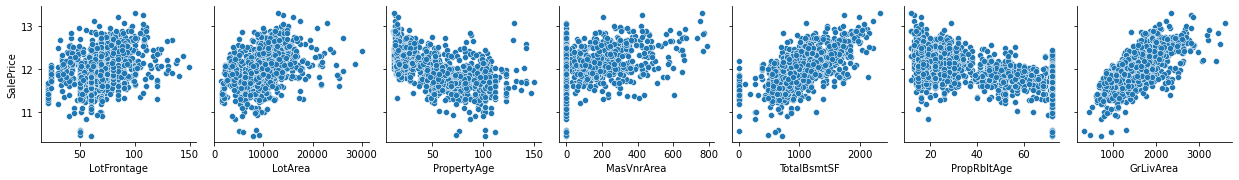

In [1435]:
#Let's recheck what is the distribution after removing outliers
sns.pairplot(data=df, x_vars=col_to_analyse1, y_vars='SalePrice')

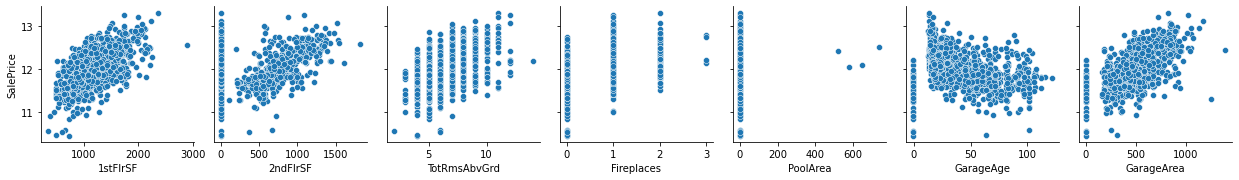

In [1436]:
#now analysing second set of features
sns.pairplot(data=df, x_vars=col_to_analyse2, y_vars='SalePrice')

PoolArea has only 7 values for analysis. Hence dropping the same.

In [1437]:
df.drop(columns=['PoolArea'], axis=1, inplace=True)
col_to_analyse2.remove('PoolArea')

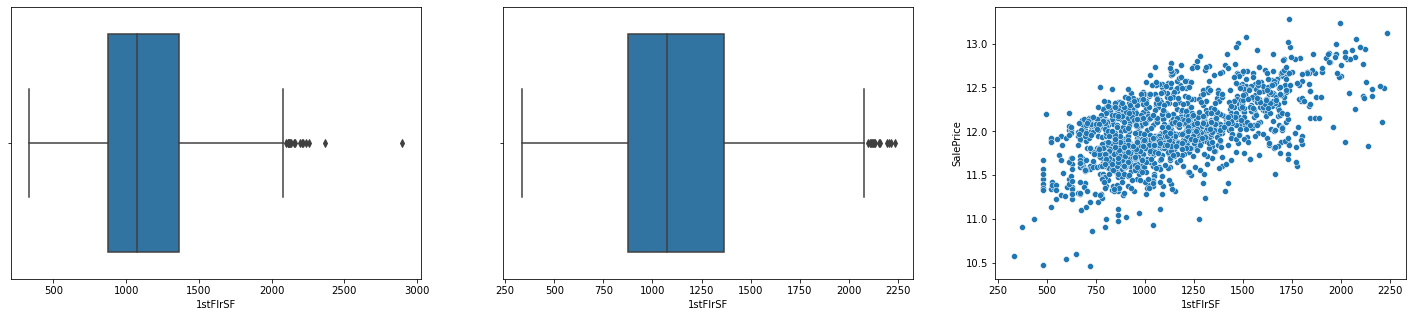

In [1438]:
#1stFlrSF also has some outlier hence removing the same
df = remove_outliers_and_analyse('1stFlrSF', 2250, df)

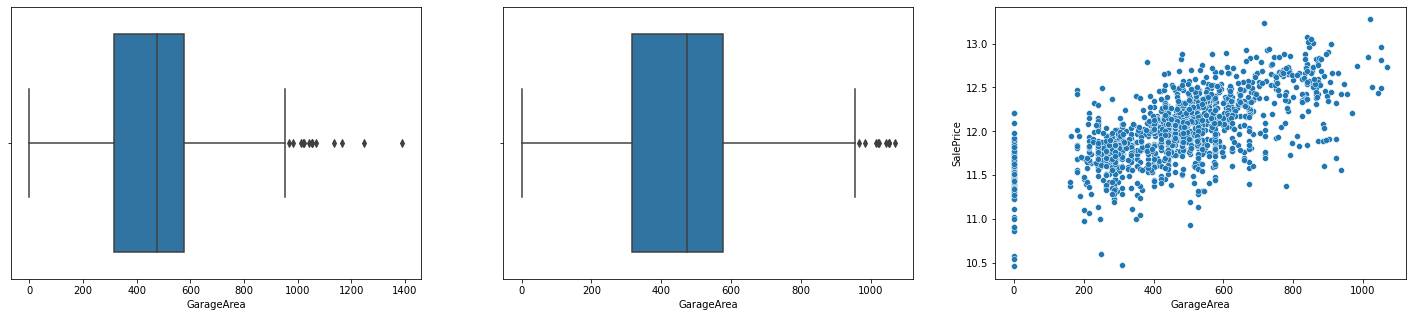

In [1439]:
#GarageArea also has some outlier hence removing the same
df = remove_outliers_and_analyse('GarageArea', 1100, df)

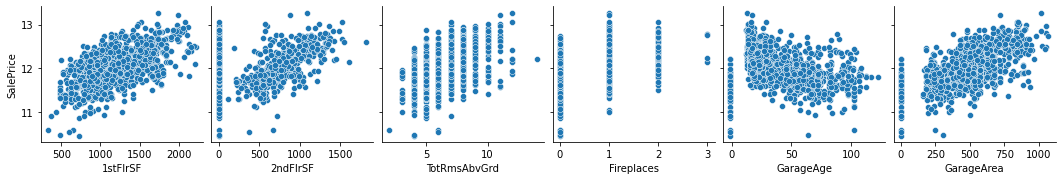

In [1440]:
#Let's recheck what is the distribution after removing outliers
sns.pairplot(data=df, x_vars=col_to_analyse2, y_vars='SalePrice')

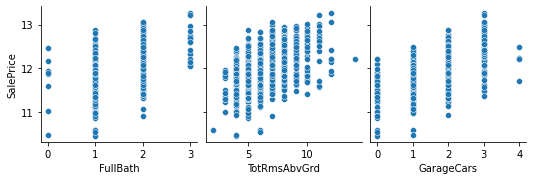

In [1441]:
#Analysing 3rd set of features
sns.pairplot(data=df, x_vars=col_to_analyse3, y_vars='SalePrice')

## Final data set

In [1442]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1405 entries, 0 to 1459
Data columns (total 57 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1405 non-null   object 
 1   MSZoning       1405 non-null   object 
 2   LotFrontage    1405 non-null   float64
 3   LotArea        1405 non-null   int64  
 4   LotShape       1405 non-null   object 
 5   LotConfig      1405 non-null   object 
 6   Neighborhood   1405 non-null   object 
 7   BldgType       1405 non-null   object 
 8   HouseStyle     1405 non-null   object 
 9   OverallQual    1405 non-null   object 
 10  OverallCond    1405 non-null   object 
 11  Exterior1st    1405 non-null   object 
 12  Exterior2nd    1405 non-null   object 
 13  MasVnrType     1405 non-null   object 
 14  MasVnrArea     1405 non-null   float64
 15  ExterQual      1405 non-null   object 
 16  Foundation     1405 non-null   object 
 17  BsmtQual       1405 non-null   object 
 18  BsmtExpo

## Dummy variables
Generating dummy variables for all the categorical variables selected above

In [1443]:
numeric_vars = df.select_dtypes(exclude=['object'])
numeric_vars.head()

,LotFrontage,LotArea,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,...,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,SalePrice,PropertyAge,GarageAge,PropSoldSince,PropRbltAge
0,65.0,8450,196.0,856,856,854,0,1710,1,0,...,0,0,0,0,2,12.247694,19,19.0,14,19
1,80.0,9600,0.0,1262,1262,0,0,1262,0,1,...,0,0,0,0,5,12.109011,46,46.0,15,46
2,68.0,11250,162.0,920,920,866,0,1786,1,0,...,0,0,0,0,9,12.317167,21,21.0,14,20
3,60.0,9550,0.0,756,961,756,0,1717,1,0,...,272,0,0,0,2,11.849398,107,24.0,16,52
4,84.0,14260,350.0,1145,1145,1053,0,2198,1,0,...,0,0,0,0,12,12.429216,22,22.0,14,22


In [1444]:
categorical_vars = df.select_dtypes(include=['object'])
categorical_vars.head()

,MSSubClass,MSZoning,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,Exterior1st,...,HeatingQC,CentralAir,KitchenQual,FireplaceQu,GarageType,GarageFinish,GarageQual,PavedDrive,Fence,SaleCondition
0,2-STORY 1946 & NEWER,RL,Reg,Inside,CollgCr,1Fam,2Story,Good,Average,VinylSd,...,Ex,Y,Gd,NF,Attchd,RFn,TA,Y,NF,Normal
1,1-STORY 1946 & NEWER ALL STYLES,RL,Reg,FR2,Veenker,1Fam,1Story,Above Average,Very Good,MetalSd,...,Ex,Y,TA,TA,Attchd,RFn,TA,Y,NF,Normal
2,2-STORY 1946 & NEWER,RL,IR1,Inside,CollgCr,1Fam,2Story,Good,Average,VinylSd,...,Ex,Y,Gd,TA,Attchd,RFn,TA,Y,NF,Normal
3,2-STORY 1945 & OLDER,RL,IR1,Corner,Crawfor,1Fam,2Story,Good,Average,Wd Sdng,...,Gd,Y,Gd,Gd,Detchd,Unf,TA,Y,NF,Abnorml
4,2-STORY 1946 & NEWER,RL,IR1,FR2,NoRidge,1Fam,2Story,Very Good,Average,VinylSd,...,Ex,Y,Gd,TA,Attchd,RFn,TA,Y,NF,Normal


In [1445]:
dummies = pd.get_dummies(df.select_dtypes(include=['object']), drop_first=True)
dummies.head()

,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,...,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NF,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0


In [1446]:
#Appending the dummies to original data set and dropping the original categories
df = df.join(dummies)
print(df.shape)
df.head()

(1405, 226)


,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NF,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,2-STORY 1946 & NEWER,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,Good,...,1,0,0,0,1,0,0,0,1,0
1,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,Above Average,...,1,0,0,0,1,0,0,0,1,0
2,2-STORY 1946 & NEWER,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,Good,...,1,0,0,0,1,0,0,0,1,0
3,2-STORY 1945 & OLDER,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,Good,...,1,0,0,0,1,0,0,0,0,0
4,2-STORY 1946 & NEWER,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,Very Good,...,1,0,0,0,1,0,0,0,1,0


In [1447]:
#Dropping the original categorical features as we have already created their dummies
df.drop(columns=categorical_vars.columns, axis=1, inplace=True)

In [1448]:
df.head()

,LotFrontage,LotArea,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,...,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NF,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,196.0,856,856,854,0,1710,1,0,...,1,0,0,0,1,0,0,0,1,0
1,80.0,9600,0.0,1262,1262,0,0,1262,0,1,...,1,0,0,0,1,0,0,0,1,0
2,68.0,11250,162.0,920,920,866,0,1786,1,0,...,1,0,0,0,1,0,0,0,1,0
3,60.0,9550,0.0,756,961,756,0,1717,1,0,...,1,0,0,0,1,0,0,0,0,0
4,84.0,14260,350.0,1145,1145,1053,0,2198,1,0,...,1,0,0,0,1,0,0,0,1,0


In [1449]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1405 entries, 0 to 1459
Columns: 199 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(4), int64(26), uint8(169)
memory usage: 604.4 KB


Now we have all numeric variables

# Linear regression

### Train test split

In [1450]:
#Splitting the data in 70 - 30 due to small data set
df_train, df_test = train_test_split(df, train_size=0.7, random_state=60)
print(df_train.shape)
print(df_test.shape)

(983, 199)
(422, 199)


### Rescaling
We will be using min max scaler here to bring all the data in same scale

In [1451]:
#Initalizing the scaler
scaler = MinMaxScaler()

#Fit on the data
df_train[numeric_vars.columns] = scaler.fit_transform(df_train[numeric_vars.columns])
df_test[numeric_vars.columns] = scaler.transform(df_test[numeric_vars.columns])
df_train.head()

,LotFrontage,LotArea,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,...,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NF,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1267,0.531250,0.415716,0.000000,0.927711,0.897003,0.000000,0.0,0.517185,0.0,0.0,...,1,0,0,0,1,0,0,0,1,0
757,0.375000,0.359957,0.416244,0.311399,0.163488,0.392739,0.0,0.310311,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
789,0.375000,0.380509,0.199239,0.385542,0.329155,0.611111,0.0,0.539771,0.0,0.0,...,1,0,0,0,1,0,0,0,1,0
278,0.671875,0.458844,0.399746,0.982854,0.953134,0.000000,0.0,0.550900,0.0,0.0,...,1,0,0,0,1,0,0,0,0,1
1424,0.375000,0.286228,0.000000,0.474513,0.529700,0.000000,0.0,0.296563,0.5,0.0,...,1,1,0,0,0,0,0,0,1,0


### Dividing into X and y set

In [1452]:
y_train = df_train.pop('SalePrice')
X_train = df_train
y_train

1267    0.846619
757     0.538356
789     0.597138
278     0.879572
1424    0.503386
          ...   
75      0.340381
102     0.435552
418     0.455960
1134    0.560243
213     0.531815
Name: SalePrice, Length: 983, dtype: float64

In [1453]:
y_test = df_test.pop('SalePrice')
X_test = df_test
y_test

1120    0.433864
973     0.586564
863     0.473825
593     0.493381
263     0.467060
          ...   
1327    0.468424
1021    0.609241
531     0.461554
716     0.539695
331     0.490835
Name: SalePrice, Length: 422, dtype: float64

#### We are going to use RFE for eliminating unwanted features
To begin with top 25 features are selected

In [1454]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=25, step=1)
rfe = rfe.fit(X_train, y_train)

In [1455]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('LotFrontage', False, 102),
 ('LotArea', True, 1),
 ('MasVnrArea', False, 129),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', False, 24),
 ('2ndFlrSF', False, 23),
 ('LowQualFinSF', False, 25),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 18),
 ('BsmtHalfBath', False, 170),
 ('FullBath', False, 63),
 ('HalfBath', False, 64),
 ('BedroomAbvGr', False, 174),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 168),
 ('Fireplaces', False, 67),
 ('GarageCars', True, 1),
 ('GarageArea', False, 5),
 ('WoodDeckSF', False, 42),
 ('OpenPorchSF', False, 66),
 ('EnclosedPorch', True, 1),
 ('3SsnPorch', False, 165),
 ('ScreenPorch', False, 2),
 ('MiscVal', True, 1),
 ('MoSold', False, 139),
 ('PropertyAge', True, 1),
 ('GarageAge', False, 87),
 ('PropSoldSince', False, 116),
 ('PropRbltAge', False, 106),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', False, 56),
 ('MSSubClass_1-STORY 1945 & OLDER', False, 140),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', False, 60),
 ('MSSubClass_1-STORY PUD 

In [1456]:
#copying selected variables in a new DF
X_train_rfe = X_train[X_train.columns[rfe.support_]]
print(X_train_rfe.shape)
X_train_rfe.describe()

(983, 25)


,LotArea,TotalBsmtSF,GrLivArea,KitchenAbvGr,GarageCars,EnclosedPorch,MiscVal,PropertyAge,MSZoning_FV,MSZoning_RH,...,OverallQual_Fair,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Poor,OverallCond_Excellent,OverallCond_Fair,OverallCond_Very Poor,Exterior1st_CBlock,HeatingQC_Po,GarageQual_Po
count,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,...,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000
mean,0.290959,0.473610,0.345387,0.347236,0.441506,0.054325,0.004774,0.281164,0.041709,0.013225,...,0.012208,0.002035,0.006104,0.001017,0.015259,0.011190,0.001017,0.001017,0.001017,0.001017
std,0.133232,0.179340,0.156190,0.071585,0.182653,0.152828,0.040760,0.221387,0.200025,0.114294,...,0.109867,0.045083,0.077927,0.031895,0.122645,0.105244,0.031895,0.031895,0.031895,0.031895
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.218431,0.362141,0.226841,0.333333,0.250000,0.000000,0.000000,0.072464,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.281761,0.448100,0.333224,0.333333,0.500000,0.000000,0.000000,0.260870,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.353310,0.584569,0.433552,0.333333,0.500000,0.000000,0.000000,0.413043,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1457]:
import statsmodels.api as sm
lm_rfe = sm.OLS(y_train,X_train_rfe).fit()

In [1458]:
print(lm_rfe.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              4962.
Date:                Sun, 07 Aug 2022   Prob (F-statistic):                        0.00
Time:                        03:28:02   Log-Likelihood:                          1536.2
No. Observations:                 983   AIC:                                     -3024.
Df Residuals:                     959   BIC:                                     -2907.
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [1459]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,OverallQual_Very Poor,inf
21,OverallCond_Very Poor,inf
10,MSZoning_RL,29.34
3,KitchenAbvGr,24.81
4,GarageCars,12.37
1,TotalBsmtSF,12.19
2,GrLivArea,9.19
0,LotArea,8.70
11,MSZoning_RM,6.12
7,PropertyAge,5.65


In [1460]:
#defining a function to remove least significant variable and reanalyse the data
def remove_feature_show_summary(colname):
  X_train_rfe.drop(columns=[colname], axis=1, inplace=True)
  lr = sm.OLS(y_train, X_train_rfe)
  lm_rfe = lr.fit()
  print(lm_rfe.summary())
  vif = pd.DataFrame()
  vif['Features'] = X_train_rfe.columns
  vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by='VIF', ascending = False)
  print(vif)
  print(X_train_rfe.head())
  return lm_rfe

In [1461]:
lm_rfe = remove_feature_show_summary('OverallQual_Poor')

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              5183.
Date:                Sun, 07 Aug 2022   Prob (F-statistic):                        0.00
Time:                        03:28:02   Log-Likelihood:                          1536.2
No. Observations:                 983   AIC:                                     -3026.
Df Residuals:                     960   BIC:                                     -2914.
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [1462]:
lm_rfe = remove_feature_show_summary('Exterior1st_CBlock')

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              5416.
Date:                Sun, 07 Aug 2022   Prob (F-statistic):                        0.00
Time:                        03:28:02   Log-Likelihood:                          1535.4
No. Observations:                 983   AIC:                                     -3027.
Df Residuals:                     961   BIC:                                     -2919.
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [1463]:
lm_rfe = remove_feature_show_summary('HeatingQC_Po')

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              5665.
Date:                Sun, 07 Aug 2022   Prob (F-statistic):                        0.00
Time:                        03:28:03   Log-Likelihood:                          1534.2
No. Observations:                 983   AIC:                                     -3026.
Df Residuals:                     962   BIC:                                     -2924.
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [1464]:
lm_rfe = remove_feature_show_summary('GarageQual_Po')

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              5935.
Date:                Sun, 07 Aug 2022   Prob (F-statistic):                        0.00
Time:                        03:28:03   Log-Likelihood:                          1532.6
No. Observations:                 983   AIC:                                     -3025.
Df Residuals:                     963   BIC:                                     -2927.
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [1465]:
lm_rfe = remove_feature_show_summary('OverallCond_Very Poor')

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              5935.
Date:                Sun, 07 Aug 2022   Prob (F-statistic):                        0.00
Time:                        03:28:03   Log-Likelihood:                          1532.6
No. Observations:                 983   AIC:                                     -3025.
Df Residuals:                     963   BIC:                                     -2927.
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [1466]:
lm_rfe = remove_feature_show_summary('LotShape_IR3')

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              6232.
Date:                Sun, 07 Aug 2022   Prob (F-statistic):                        0.00
Time:                        03:28:03   Log-Likelihood:                          1530.9
No. Observations:                 983   AIC:                                     -3024.
Df Residuals:                     964   BIC:                                     -2931.
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [1467]:
#Finding predicted values for y
y_train_predict = lm_rfe.predict(X_train_rfe)
y_train_predict

1267    0.849031
757     0.526999
789     0.615335
278     0.872429
1424    0.492784
          ...   
75      0.370230
102     0.455216
418     0.421379
1134    0.588999
213     0.528274
Length: 983, dtype: float64

In [1468]:
#Finding the difference between actual and predicted values
residue = y_train - y_train_predict
residue

1267   -0.002411
757     0.011357
789    -0.018197
278     0.007143
1424    0.010602
          ...   
75     -0.029849
102    -0.019664
418     0.034582
1134   -0.028756
213     0.003541
Length: 983, dtype: float64

<AxesSubplot:ylabel='Density'>

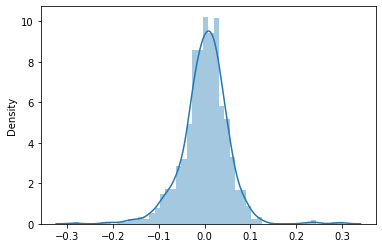

In [1469]:
#The residue must be normally distributed hence checking the same using histogram
sns.distplot(residue)

In [1470]:
#Finding predicted values for y
y_test_predict = lm_rfe.predict(X_test[X_train_rfe.columns])
y_test_predict

1120    0.389681
973     0.658283
863     0.477063
593     0.458042
263     0.444170
          ...   
1327    0.483384
1021    0.573454
531     0.423721
716     0.563648
331     0.457238
Length: 422, dtype: float64

In [1471]:
residue = y_test - y_test_predict
residue

1120    0.044183
973    -0.071720
863    -0.003238
593     0.035338
263     0.022890
          ...   
1327   -0.014960
1021    0.035787
531     0.037832
716    -0.023953
331     0.033597
Length: 422, dtype: float64

<AxesSubplot:ylabel='Density'>

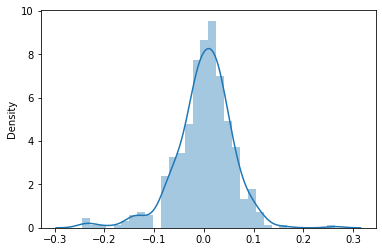

In [1472]:
#The residue must be normally distributed hence checking the same using histogram
sns.distplot(residue)

# Ridge Regression

In [1473]:
params = {"alpha": [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 
                    0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 
                    1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 
                    50, 100, 500, 1000]}

ridge = Ridge()

folds = 5
model_cv = GridSearchCV(estimator          = ridge,
                        param_grid         = params,
                        scoring            = 'neg_mean_absolute_error',
                        cv                 = folds,
                        return_train_score = True,
                        verbose            = 1)

model_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5,
                                   6, 7, 8, 9, 10, 20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1474]:
print(model_cv.best_params_)

{'alpha': 0.6}


In [1475]:
alpha = model_cv.best_params_.get('alpha')
ridge = Ridge(alpha = alpha)

ridge.fit(X_train_rfe, y_train)

sorted(list(zip(ridge.feature_names_in_, ridge.coef_)), key=lambda x: abs(x[1]), reverse=True)

[('GrLivArea', 0.3697772104236971),
 ('PropertyAge', -0.17973098482058686),
 ('TotalBsmtSF', 0.16134840936963923),
 ('KitchenAbvGr', -0.13992005494528825),
 ('MSZoning_FV', 0.12977819053836678),
 ('GarageCars', 0.11806579707376413),
 ('MSZoning_RL', 0.10988282279146065),
 ('OverallCond_Fair', -0.09460116379923501),
 ('OverallQual_Very Poor', -0.08815493266676756),
 ('OverallQual_Very Excellent', 0.0877108302921396),
 ('MSZoning_RM', 0.0817187898929734),
 ('Neighborhood_Crawfor', 0.07261693007380297),
 ('MSZoning_RH', 0.07192866129058197),
 ('OverallQual_Excellent', 0.0655281196568119),
 ('OverallQual_Fair', -0.058704794015467424),
 ('OverallCond_Excellent', 0.057825635356067544),
 ('MiscVal', -0.057437178121671165),
 ('LotArea', 0.052924899345363846),
 ('EnclosedPorch', 0.04115657883329403)]

In [1476]:
#Checking what happens if we double the alpha value
alpha = model_cv.best_params_.get('alpha') * 2
ridge2 = Ridge(alpha = alpha)

ridge2.fit(X_train_rfe, y_train)

sorted(list(zip(ridge2.feature_names_in_, ridge2.coef_)), key=lambda x: abs(x[1]), reverse=True)

[('GrLivArea', 0.3590864890272722),
 ('PropertyAge', -0.17852836764755167),
 ('TotalBsmtSF', 0.16139542429195797),
 ('KitchenAbvGr', -0.12519370671228158),
 ('GarageCars', 0.12184193225639414),
 ('MSZoning_FV', 0.1102058629882832),
 ('OverallCond_Fair', -0.09127622728640568),
 ('MSZoning_RL', 0.09090588728033686),
 ('OverallQual_Very Excellent', 0.08144160225353973),
 ('Neighborhood_Crawfor', 0.07249204657768002),
 ('OverallQual_Excellent', 0.06526997008506914),
 ('OverallQual_Very Poor', -0.06443724209948513),
 ('MSZoning_RM', 0.06212238020099935),
 ('OverallQual_Fair', -0.05992713804262786),
 ('OverallCond_Excellent', 0.05651991808202645),
 ('LotArea', 0.05430700258087478),
 ('MSZoning_RH', 0.05060109478766083),
 ('MiscVal', -0.04565532832892833),
 ('EnclosedPorch', 0.039165135826286744)]

# Lasso Regression

In [1477]:
params = {"alpha": [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 
                    0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 
                    1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 
                    50, 100, 500, 1000]}

lasso = Lasso()

folds = 5
model_cv = GridSearchCV(estimator          = lasso,
                        param_grid         = params,
                        scoring            = 'neg_mean_absolute_error',
                        cv                 = folds,
                        return_train_score = True,
                        verbose            = 1)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5,
                                   6, 7, 8, 9, 10, 20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1478]:
print(model_cv.best_params_)

{'alpha': 0.0001}


In [1479]:
alpha = model_cv.best_params_.get("alpha")
lasso = Lasso(alpha = alpha)
lasso.fit(X_train, y_train)

sorted(list(zip(lasso.feature_names_in_, lasso.coef_)), key=lambda x: abs(x[1]), reverse=True)[0:19]

[('GrLivArea', 0.2671469372964746),
 ('OverallQual_Poor', -0.09880019554309176),
 ('TotalBsmtSF', 0.09859946199363262),
 ('PropertyAge', -0.09639807352059222),
 ('OverallCond_Fair', -0.07254435336714682),
 ('OverallQual_Excellent', 0.062404004804178355),
 ('OverallQual_Fair', -0.05812036950679377),
 ('OverallQual_Very Excellent', 0.0553381277220265),
 ('Neighborhood_Crawfor', 0.04788372100666584),
 ('LotArea', 0.04001022871444161),
 ('OverallQual_Very Good', 0.038186776814054885),
 ('GarageArea', 0.036492911555673024),
 ('Neighborhood_MeadowV', -0.035619828100465406),
 ('Exterior1st_BrkFace', 0.034884965274460965),
 ('SaleCondition_Partial', 0.0337787546668187),
 ('ExterQual_Fa', -0.032988447865059424),
 ('GarageCars', 0.031433551273212866),
 ('Neighborhood_StoneBr', 0.029721060929445195),
 ('ScreenPorch', 0.028145866993525524)]

In [1480]:
#Checking what happens if we double the alpha value
alpha = model_cv.best_params_.get("alpha") * 2
lasso2 = Lasso(alpha = alpha)
lasso2.fit(X_train, y_train)

sorted(list(zip(lasso2.feature_names_in_, lasso2.coef_)), key=lambda x: abs(x[1]), reverse=True)[0:19]

[('GrLivArea', 0.2674257394459542),
 ('TotalBsmtSF', 0.11158164404794883),
 ('PropertyAge', -0.08613463360080315),
 ('OverallCond_Fair', -0.06712035738858989),
 ('OverallQual_Excellent', 0.06522413856055677),
 ('OverallQual_Fair', -0.051116713304384574),
 ('Neighborhood_Crawfor', 0.04932370920411306),
 ('OverallQual_Very Excellent', 0.04648428386412614),
 ('OverallQual_Poor', -0.04559671284106508),
 ('GarageArea', 0.04106467025616604),
 ('OverallQual_Very Good', 0.03794120407761004),
 ('SaleCondition_Partial', 0.035666625208767226),
 ('LotArea', 0.034662281212480606),
 ('GarageCars', 0.03084913088326603),
 ('Exterior1st_BrkFace', 0.03020879647455662),
 ('ExterQual_Fa', -0.02903876699849657),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.024855024812914083),
 ('Neighborhood_MeadowV', -0.02470370166583086),
 ('WoodDeckSF', 0.024308444285386564)]

In [1481]:
def get_metrics(train_org, train_pred, test_org, test_pred):
    metrics = []
    metrics.append(r2_score(train_org, train_pred))
    metrics.append(r2_score(test_org, test_pred))
    metrics.append(np.sum(np.square(train_org - train_pred)))
    metrics.append(np.sum(np.square(test_org - test_pred)))
    metrics.append(np.sqrt(mean_squared_error(train_org, train_pred)))
    metrics.append(np.sqrt(mean_squared_error(test_org, test_pred)))
    return metrics

In [1482]:
metrics_comp = {'Metric': ['R2 Score (Train)', 'R2 Score (Test)', 'RSS (Train)', 'RSS (Test)', 'RMSE (Train)', 'RMSE (Test)']}
df_metric = pd.DataFrame(metrics_comp, columns = ['Metric'])

df_metric['Linear Regression (RFE)'] = get_metrics(y_train, lm_rfe.predict(X_train_rfe), y_test, lm_rfe.predict(X_test[X_train_rfe.columns]))
df_metric['RFE + Ridge regression'] = get_metrics(y_train, ridge.predict(X_train_rfe), y_test, ridge.predict(X_test[X_train_rfe.columns]))
df_metric['RFE + Ridge regression (2xalpha)'] = get_metrics(y_train, ridge2.predict(X_train_rfe), y_test, ridge2.predict(X_test[X_train_rfe.columns]))
df_metric['Lasso regression'] = get_metrics(y_train, lasso.predict(X_train), y_test, lasso.predict(X_test))
df_metric['Lasso regression (2xalpha)'] = get_metrics(y_train, lasso2.predict(X_train), y_test, lasso2.predict(X_test))

df_metric

,Metric,Linear Regression (RFE),RFE + Ridge regression,RFE + Ridge regression (2xalpha),Lasso regression,Lasso regression (2xalpha)
0,R2 Score (Train),0.858805,0.873497,0.871964,0.934887,0.929196
1,R2 Score (Test),0.814677,0.826348,0.823812,0.894973,0.891438
2,RSS (Train),2.554851,2.289005,2.316751,1.178186,1.281169
3,RSS (Test),1.405634,1.317112,1.336348,0.796603,0.823417
4,RMSE (Train),0.050981,0.048255,0.048547,0.034620,0.036102
5,RMSE (Test),0.057714,0.055867,0.056273,0.043447,0.044173


As per Lasso 5 monst signification features are
* GrLivArea
* OverallQual_Poor
* TotalBsmtSF
* PropertyAge
* OverallCond_Fair

Hence removing these from train data set to find next 5 significant features

In [1483]:
X_train.drop(columns=['GrLivArea', 'OverallQual_Poor', 'TotalBsmtSF', 'PropertyAge', 'OverallCond_Fair'], axis=1, inplace=True)

In [1484]:
params = {"alpha": [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 
                    0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 
                    1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 
                    50, 100, 500, 1000]}

lasso = Lasso()

folds = 5
model_cv = GridSearchCV(estimator          = lasso,
                        param_grid         = params,
                        scoring            = 'neg_mean_absolute_error',
                        cv                 = folds,
                        return_train_score = True,
                        verbose            = 1)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5,
                                   6, 7, 8, 9, 10, 20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1485]:
print(model_cv.best_params_)

{'alpha': 0.0001}


In [1486]:
alpha = model_cv.best_params_.get("alpha")
lasso = Lasso(alpha = alpha)
lasso.fit(X_train, y_train)

sorted(list(zip(lasso.feature_names_in_, lasso.coef_)), key=lambda x: abs(x[1]), reverse=True)[0:5]

[('1stFlrSF', 0.21115686321822888),
 ('2ndFlrSF', 0.12405922718549603),
 ('OverallQual_Excellent', 0.06446192387347617),
 ('OverallQual_Fair', -0.05674981796543508),
 ('MSZoning_FV', 0.05219022028894706)]